# Table of Contents

0.1 Importing Libraries

0.2 Importing Data

0.3 Exploring Original Df

0.4 Defining styles and labels formats

0.5 Random sampling of 30% of data

0.6 Exploration of senior_citizen profile

    0.6.1 importance of this profile
            A. count of users
            B. gross sales (total_spent_in_lifetime)
            C. total items (total_items_in_lifetime)
            D. per order stats
    
    0.6.2. demographics of this profile
            A. income
            B. income_group
            C. gender
            D. region
            E. fam_status
            F. n_dependants
            G. pet_owner
    
    0.6.2  what we know about their shopping habits
            A. loyalty_flag (based on max_order)
            B. low_activity_flag
            C. spender_type (based on mean_spending)
            D. frequent_shopper (based on median_days_since_ordering)
            E. day_of_the_week
            F. time_of_day
            G. most popular departments by number of items
            H. most popular departments by amount spent
   


### 0.1 Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### 0.2 Importing Data

In [2]:
# Identify the file pathway to data files
path = r'C:\Users\CJ\Documents\_CJ-Stuff\Career Foundry\Data Immersion\Ach 4 - Python\2023-03 Instacart Basket Analysis'

In [3]:
# Import data from 'orders_products_all3.pkl'
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all3.pkl'))

In [4]:
# Import data from 'dept_data.pkl'
dept_data = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'department_data.pkl'))

### 0.3 Exploring Original dfs

In [5]:
df.shape

(32434489, 45)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434489 entries, 0 to 32434488
Data columns (total 45 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   order_id                     int64         
 1   user_id                      int64         
 2   order_number                 int16         
 3   order_day_of_week            int8          
 4   order_hour_of_day            int8          
 5   days_since_prior_order       float16       
 6   first_order_of_new_customer  bool          
 7   product_id                   int32         
 8   add_to_cart_order            int16         
 9   reordered                    int8          
 10  product_name                 object        
 11  aisle_id                     float16       
 12  department_id                float16       
 13  price                        float32       
 14  product_info_available       bool          
 15  price_available              bool          
 16

In [7]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,first_order_of_new_customer,product_id,add_to_cart_order,reordered,...,total_spent_in_order,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,income_group,senior_citizen,two_parent_fam,single_parent
0,2539329,1,1,2,8,NaN,True,196,1,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False
1,2539329,1,1,2,8,NaN,True,14084,2,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False
4,2539329,1,1,2,8,NaN,True,26405,5,0,...,31.6,375.700012,59,5.898438,False,False,Low income,False,True,False


In [8]:
df.isnull().sum()

order_id                             0
user_id                              0
order_number                         0
order_day_of_week                    0
order_hour_of_day                    0
days_since_prior_order         2078068
first_order_of_new_customer          0
product_id                           0
add_to_cart_order                    0
reordered                            0
product_name                     30770
aisle_id                         30770
department_id                    30770
price                            35897
product_info_available               0
price_available                      0
price_range                      35897
busiest_day                          0
busiest_days                         0
busiest_period_of_day                0
max_order                            0
loyalty_flag                         0
mean_spending                        0
spender_type                         0
median_days_since_ordering           0
frequent_shopper         

All nulls have been previously accounted for and labeled appropriately with flags.

In [9]:
dept_data.shape

(21, 8)

In [10]:
dept_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   department                   21 non-null     category
 1   department_id                21 non-null     int8    
 2   total_items_sold_by_dept     21 non-null     int64   
 3   total_spent_in_dept          21 non-null     float32 
 4   avg_price_per_item_in_dept   21 non-null     float32 
 5   total_orders_from_dept       21 non-null     int32   
 6   avg_items_per_order_by_dept  21 non-null     float32 
 7   n_unique_items_in_dept       21 non-null     int16   
dtypes: category(1), float32(3), int16(1), int32(1), int64(1), int8(1)
memory usage: 924.0 bytes


In [11]:
dept_data.head()

,department,department_id,total_items_sold_by_dept,total_spent_in_dept,avg_price_per_item_in_dept,total_orders_from_dept,avg_items_per_order_by_dept,n_unique_items_in_dept
0,frozen,1,2234743,17289206.00,7.736552,1180461,1.893110,4006
1,other,2,36291,253708.00,6.990934,35056,1.035229,548
2,bakery,3,1172428,9208026.00,7.853809,878658,1.334339,1515
3,produce,4,9479291,75660936.00,7.981709,2409320,3.934426,1684
4,alcohol,5,153696,1251654.25,8.143701,84689,1.814828,1054


In [12]:
dept_data.isnull().sum()

department                     0
department_id                  0
total_items_sold_by_dept       0
total_spent_in_dept            0
avg_price_per_item_in_dept     0
total_orders_from_dept         0
avg_items_per_order_by_dept    0
n_unique_items_in_dept         0
dtype: int64

### 0.4 Defining styles and label formats

In [13]:
# Creating a consistent style for titles and axis labels
font_title = {'family':'serif','color':'forestgreen','size':20}
font_sm_title = {'family':'serif','color':'forestgreen','size':16}
font_label = {'family': 'serif', 'color' :'forestgreen', 'size':15}
font_sm_label = {'family': 'serif', 'color' :'forestgreen', 'size':13}

In [14]:
# Identifying the days of the week that go with the code in the df
# 0 = Sat, 1 = Sun, etc.
dow = ('Sat', 'Sun', 'Mon', 'Tues', 'Weds', 'Thurs', 'Fri')
dow_xticks = np.arange(len(dow))

In [15]:
# Identifying the hours of the day that go with the code in the df
# 0 = 12 a.m., 1 = 1 a.m.... 13 = 1 p.m., etc.
hod = ('Midnight','1 a.m.', '2 a.m.', '3 a.m.', '4 a.m.', '5 a.m.', 
       '6 a.m.', '7 a.m.', '8 a.m.', '9 a.m.', '10 a.m.', '11 a.m.', 
       'Noon', '1 p.m.', '2 p.m.', '3 p.m.', '4 p.m.', '5 p.m.', 
       '6 p.m.', '7 p.m.', '8 p.m.', '9 p.m.', '10 p.m.', '11 p.m.')
hod_xticks = np.arange(len(hod))

In [16]:
# Turning off the scientific notation
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

In [17]:
# Define colors dark grey and forest green for plots
# colors = ['A9A9A9', '228B22']

In [18]:
# Identifying which profile we are investigating
profile = 'single_parent'
profile_label = 'Single Parent'
not_profile_label = 'Other Users'
labels = ['Single Parent', 'Other Users']
labels_r = ['Other Users', 'Single Parent']

### 0.5 Creating a subset df with each row = 1 user and profile flag

In [19]:
# Create a temporary df to use for visualizations that should be per user
# rather than per item ordered
df_user_subset = pd.DataFrame()

In [20]:
df_user_subset = df[['user_id', 'loyalty_flag', 'spender_type', 'frequent_shopper', 'gender', 'age', 'n_dependants', 'fam_status', 'income', 'income_group', 'region', 'low_activity_flag', 'total_spent_in_lifetime', 'total_items_in_lifetime', 'avg_items_per_order_by_user', 'baby_parent', 'pet_owner', 'senior_citizen', 'two_parent_fam', 'single_parent']]

In [21]:
df_user_subset.head()

,user_id,loyalty_flag,spender_type,frequent_shopper,gender,age,n_dependants,fam_status,income,income_group,region,low_activity_flag,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,senior_citizen,two_parent_fam,single_parent
0,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.70,59,5.90,False,False,False,True,False
1,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.70,59,5.90,False,False,False,True,False
2,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.70,59,5.90,False,False,False,True,False
3,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.70,59,5.90,False,False,False,True,False
4,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.70,59,5.90,False,False,False,True,False


In [22]:
df_user_subset.shape

(32434489, 20)

This has the same number of rows as the original df and only the 20 subsetted columns.

In [23]:
# Remove duplicate rows
df_user_subset = df_user_subset.drop_duplicates()

In [24]:
# Checking new shape
df_user_subset.shape

(206209, 20)

In [25]:
df_user_subset.head()

,user_id,loyalty_flag,spender_type,frequent_shopper,gender,age,n_dependants,fam_status,income,income_group,region,low_activity_flag,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,senior_citizen,two_parent_fam,single_parent
0,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,South,False,375.70,59,5.90,False,False,False,True,False
59,2,Regular customer,Low spender,Regular customer,Female,68,3,married,64940,Middle class,West,False,"1,465.60",195,13.93,False,False,True,True,False
254,3,Regular customer,Low spender,Regular customer,Female,33,3,married,93240,Middle class,West,False,721.40,88,7.33,False,False,False,True,False
342,4,New customer,Low spender,Regular customer,Male,31,3,married,45435,Low income,South,False,147.70,18,3.60,False,False,False,True,False
360,5,New customer,Low spender,Regular customer,Female,75,0,divorced/widowed,115242,Middle class,West,True,340.00,37,9.25,False,False,True,False,False


Now we have a dataframe that reflects the users specifically.

In [26]:
df_user_subset.loc[df_user_subset[profile] == True, 'profile_flag'] = profile_label
df_user_subset.loc[df_user_subset[profile] == False, 'profile_flag'] = not_profile_label
    

In [27]:
df_user_subset.head()

,user_id,loyalty_flag,spender_type,frequent_shopper,gender,age,n_dependants,fam_status,income,income_group,...,low_activity_flag,total_spent_in_lifetime,total_items_in_lifetime,avg_items_per_order_by_user,baby_parent,pet_owner,senior_citizen,two_parent_fam,single_parent,profile_flag
0,1,New customer,Low spender,Regular customer,Female,31,3,married,40423,Low income,...,False,375.70,59,5.90,False,False,False,True,False,Other Users
59,2,Regular customer,Low spender,Regular customer,Female,68,3,married,64940,Middle class,...,False,"1,465.60",195,13.93,False,False,True,True,False,Other Users
254,3,Regular customer,Low spender,Regular customer,Female,33,3,married,93240,Middle class,...,False,721.40,88,7.33,False,False,False,True,False,Other Users
342,4,New customer,Low spender,Regular customer,Male,31,3,married,45435,Low income,...,False,147.70,18,3.60,False,False,False,True,False,Other Users
360,5,New customer,Low spender,Regular customer,Female,75,0,divorced/widowed,115242,Middle class,...,True,340.00,37,9.25,False,False,True,False,False,Other Users


## 0.6. Exploration of single_parent profile

### 0.6.1 importance of this profile

#### 0.6.1.A  count of users

In [28]:
# Create a temporary df to hold the count of the profile
num_profile = df_user_subset['profile_flag'].value_counts()

In [29]:
num_profile

Other Users      196508
Single Parent      9701
Name: profile_flag, dtype: int64

Roughly 4.7% of our customer base are single parents - just under 1/20th.  (9701/206,209) 

In [30]:
# Reset the index so that the correct column headers will appear
num_profile = pd.DataFrame(num_profile).reset_index()

In [31]:
num_profile

,index,profile_flag
0,Other Users,196508
1,Single Parent,9701


In [32]:
# Set the index to be the boolean column with a header of 'index'
num_profile.set_index('index')

,profile_flag
index,
Other Users,196508
Single Parent,9701


Text(0.5, 1.0, '4.7% of our users are single parents.')

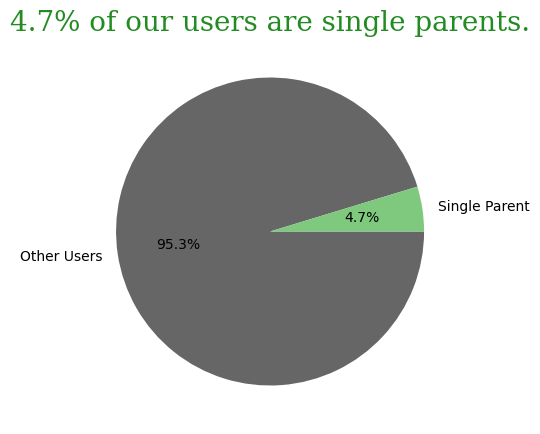

In [33]:
plot = num_profile.plot.pie(y='profile_flag', 
                            figsize=(7,5), 
                            counterclock=False, 
                            colormap='Accent_r', 
                            legend=False, 
                            labels = labels_r, 
                            autopct='%1.1f%%')
plt.ylabel('')

plt.title ("4.7% of our users are single parents.", 
           fontdict = font_title)


#### 0.6.1.B  gross sales (total_spent_in_lifetime)

In [35]:
# Calculate the gross sales for those in the profile and out of it
gross_sales_profile = df_user_subset.groupby('profile_flag').total_spent_in_lifetime.sum()

In [36]:
gross_sales_profile

profile_flag
Other Users     240,324,528.00
Single Parent    12,093,848.00
Name: total_spent_in_lifetime, dtype: float32

Single parents account for roughly 4.8% of gross sales.  Since this is in line with what would we expect, we won't make a visualizations for it.

#### 0.6.1.C  total items (total_items_in_lifetime)

In [34]:
# Calculate the total items for those in the profile and out of it
total_items = df_user_subset.groupby(profile).total_items_in_lifetime.sum()

In [35]:
total_items

single_parent
False    30882303
True      1552186
Name: total_items_in_lifetime, dtype: int32

Single parents also purchase 4.8% of all items.  Since this is not significantly different from the gross sales, we won't make a visual of it.

In [36]:
#Reclaiming space
del total_items

#### 0.6.1.D per order stats

In [37]:
# Calculate the avg_items_per_order for those in the profile and out of it
size_of_orders = df_user_subset.groupby(profile).avg_items_per_order_by_user.mean()

In [38]:
size_of_orders

single_parent
False    9.95
True    10.01
Name: avg_items_per_order_by_user, dtype: float16

There is not a significant difference in the average size of orders between the profile group and not-profile group, so we will not create a visualization for this.

In [39]:
#Reclaiming space
del size_of_orders

### 0.6.2 demographics of this profile

#### 0.6.2.A income

In [40]:
# Create a temporary df to hold income statistics by profile group and not
income_stats = df_user_subset.groupby('profile_flag').income.describe()

In [41]:
income_stats

,count,mean,std,min,25%,50%,75%,max
profile_flag,,,,,,,,
Other Users,"196,508.00","95,968.72","42,771.05","25,903.00","60,852.75","95,191.50","126,419.00","593,901.00"
Single Parent,"9,701.00","67,572.91","22,855.64","25,937.00","52,916.00","67,295.00","82,900.00","396,364.00"


Single parents have a mean income that is only nearly 30k lower than those in other households, and their maximum is nearly 200k smaller. The min is effectively the same.

In [42]:
# Create temporary dfs to hold income by profile group for box-and-whiskers plot
income_profile = df_user_subset['income'][df_user_subset['profile_flag']==profile_label]
income_not_profile = df_user_subset['income'][df_user_subset['profile_flag']==not_profile_label]

# Identify dfs to use for box-and-whisker-plots
dataset = [income_not_profile, income_profile]

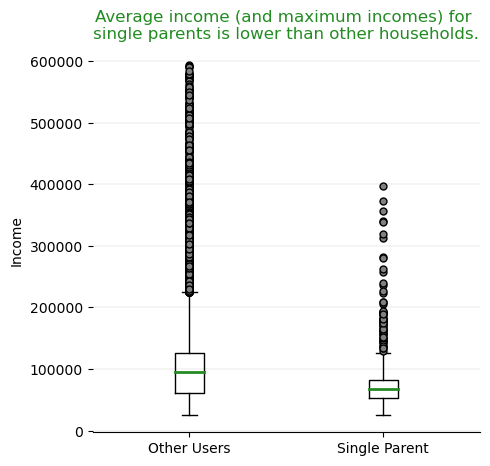

In [43]:
# Create a box-and-whiskers plot of incomes, grouped by profile
fig, ax = plt.subplots(figsize=(5, 5))

# Remove top and side borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# Add major gridlines in the y-axis
ax.grid(color='grey', 
        axis='y', 
        linestyle='-', 
        linewidth=0.25, 
        alpha=0.5)

#Adjust the look of the boxplot
flierprops = dict(marker='.', 
                  markerfacecolor='grey', 
                  markersize=10, 
                  linestyle='none')
medianprops = dict(linestyle='-', 
                   linewidth=2, 
                   color='forestgreen')

# Set plot title
ax.set_title('Average income (and maximum incomes) for \nsingle parents is lower than other households.', 
             color='forestgreen')
ax.set_ylabel('Income')

# Note: labels is defined at the beginning of 0.6

# Create boxplot
income_box = ax.boxplot(dataset, 
                        labels=labels_r,
                        flierprops=flierprops, 
                        medianprops=medianprops)

plt.show()

In [44]:
# Reclaiming space
del income_stats
del income_profile
del income_not_profile
del dataset

#### 0.6.2.B income_groups

In [45]:
# Create a cross tabulation to show the proportions of the profile
# members in each income_group
cross_tab_prop_groups = pd.crosstab(index=df_user_subset['income_group'],
                            columns=df_user_subset['profile_flag'],
                            normalize='index')
cross_tab_prop_groups

profile_flag,Other Users,Single Parent
income_group,,
Affluent,0.98,0.02
Low income,0.94,0.06
Middle class,0.95,0.05
Upper middle class,1.00,0.00


In [46]:
# Create a cross tabulation to show the proportions of the profile
# members in each income_group
cross_tab_prop_groups2 = pd.crosstab(index=df_user_subset['profile_flag'],
                            columns=df_user_subset['income_group'],
                            normalize='index')
cross_tab_prop_groups2

income_group,Affluent,Low income,Middle class,Upper middle class
profile_flag,,,,
Other Users,0.00,0.16,0.72,0.11
Single Parent,0.00,0.22,0.78,0.00


Single parents are essentially only in the low income or middle class groups, with little to no representation in the upper-middle class or affluent income groups. 

In [47]:
# Reclaiming space
del cross_tab_prop_groups
del cross_tab_prop_groups2

#### 0.6.2.C gender

In [48]:
# Create a cross tabulation to show the proportions of the profile
# members in each gender
cross_tab_prop_groups = pd.crosstab(index=df_user_subset['profile_flag'],
                            columns=df_user_subset['gender'],
                            normalize='index')
cross_tab_prop_groups

gender,Female,Male
profile_flag,,
Other Users,0.50,0.50
Single Parent,0.49,0.51


Since it appears that both the profile group and not-profile group are essentially split 50-50 across genders, this does not warrant a visualization. 

In [49]:
# Reclaiming space
del cross_tab_prop_groups

#### 0.6.2.D region

In [50]:
# Create a cross tabulation to show the proportions of the profile
# members in each region
cross_tab_prop_groups = pd.crosstab(index=df_user_subset['region'],
                            columns=df_user_subset['profile_flag'],
                            normalize='index')
cross_tab_prop_groups

profile_flag,Other Users,Single Parent
region,,
Midwest,0.95,0.05
Northeast,0.96,0.04
South,0.95,0.05
West,0.95,0.05


In [51]:
# Create a cross tabulation to show the proportions of the profile
# members in each region
cross_tab_prop_groups2 = pd.crosstab(index=df_user_subset['profile_flag'],
                            columns=df_user_subset['region'],
                            normalize='index')
cross_tab_prop_groups2

region,Midwest,Northeast,South,West
profile_flag,,,,
Other Users,0.24,0.18,0.33,0.25
Single Parent,0.24,0.16,0.34,0.26


There are minimal difference by region for where the profile group is located

In [52]:
#Reclaiming space
del cross_tab_prop_groups
del cross_tab_prop_groups2

#### 0.6.2.E fam_status

In [53]:
# Create a cross tabulation to show the proportions of the profile
# members by fam_status
cross_tab_prop_groups = pd.crosstab(index=df_user_subset['fam_status'],
                            columns=df_user_subset['profile_flag'],
                            normalize='index')
cross_tab_prop_groups

profile_flag,Other Users,Single Parent
fam_status,,
divorced/widowed,1.00,0.00
living with parents and siblings,0.00,1.00
married,1.00,0.00
single,1.00,0.00


This is a bizarre finding that I have to attribute to this being a ficticiuos data set since it is reporting that 100% of single parents live with their own parents.

#### 0.6.2.F n_dependants

In [54]:
# Create a cross tabulation to show the proportions of the profile
# members with n_dependants
cross_tab_prop_groups = pd.crosstab(index=df_user_subset['profile_flag'],
                            columns=df_user_subset['n_dependants'],
                            normalize='index')
cross_tab_prop_groups

n_dependants,0,1,2,3
profile_flag,,,,
Other Users,0.26,0.25,0.25,0.25
Single Parent,0.00,0.33,0.34,0.33


Single parents are evenly split between having 1, 2, or 3 children.
This does not seem to warrent a visualization.

In [55]:
# Reclaim space
del cross_tab_prop_groups

#### 0.6.2.G pet_owner

In [56]:
# Create a cross tabulation to show the proportions of the profile
# members who also own pets
cross_tab_prop_groups = pd.crosstab(index=df_user_subset['profile_flag'],
                            columns=df_user_subset['pet_owner'],
                            normalize='index')
cross_tab_prop_groups

pet_owner,False,True
profile_flag,,
Other Users,0.93,0.07
Single Parent,0.93,0.07


Since there is no difference in the percentage of pet_owners based on whether someone is a senior or not, there is no reason to do a visualization.

In [57]:
# Reclaim space
del cross_tab_prop_groups

### 0.6.3 what we know about their shopping habits

#### 0.6.2.A loyalty_flag (based on max_order)

In [58]:
# Create a cross tabulation to show the proportions of the profile
# members with loyalty_flag
cross_tab_prop_groups = pd.crosstab(index=df_user_subset['profile_flag'],
                            columns=df_user_subset['loyalty_flag'],
                            normalize='index')
cross_tab_prop_groups

loyalty_flag,Loyal customer,New customer,Regular customer
profile_flag,,,
Other Users,0.08,0.54,0.37
Single Parent,0.08,0.54,0.37


Since there is no difference in the loyalty_flag based on whether someone is in this profile or note, there is no reason to do a visualization. 

In [59]:
# Reclaim space
del cross_tab_prop_groups

#### 0.6.2.B low_activity_flag

In [60]:
# Create a cross tabulation to show the proportions of the profile
# members with loyalty_flag
cross_tab_prop_groups = pd.crosstab(index=df_user_subset['profile_flag'],
                            columns=df_user_subset['low_activity_flag'],
                            normalize='index')
cross_tab_prop_groups

low_activity_flag,False,True
profile_flag,,
Other Users,0.79,0.21
Single Parent,0.78,0.22


Since there is no meaningful difference in the percentage of low_activity_flags based on whether someone is in this profile or not, there is no reason to do a visualization. 

In [61]:
# Reclaim space
del cross_tab_prop_groups

#### 0.6.2.C spender_type (based on mean_spending)

In [62]:
# Create a cross tabulation to show the proportions of the profile
# members with spender_type
cross_tab_prop_groups = pd.crosstab(index=df_user_subset['profile_flag'],
                            columns=df_user_subset['spender_type'],
                            normalize='index')
cross_tab_prop_groups

spender_type,High spender,Low spender
profile_flag,,
Other Users,0.02,0.98
Single Parent,0.02,0.98


Since there is no difference in the percentage of spender_type based on whether someone is a in this profile or not, there is no reason to do a visualization. 

In [63]:
# Reclaim space
del cross_tab_prop_groups

#### 0.6.2.D frequent_shopper (based on median_days_since_ordering)

In [64]:
# Create a cross tabulation to show the proportions of the profile
# members with frequent_shopper
cross_tab_prop_groups = pd.crosstab(index=df_user_subset['profile_flag'],
                            columns=df_user_subset['frequent_shopper'],
                            normalize='index')
cross_tab_prop_groups

frequent_shopper,Frequent customer,Non-frequent customer,Regular customer
profile_flag,,,
Other Users,0.41,0.27,0.31
Single Parent,0.42,0.28,0.30


Since there is minimal difference in the percentage of different frequent_shopper flags based on whether someone is in this profile or not, there is no reason to do a visualization. 

In [65]:
# Reclaim space
del cross_tab_prop_groups

#### 0.6.2.E order_day_of_week

In [66]:
# Create a cross tabulation to show the proportions of the profile
# members with order_day_of_week
cross_tab_prop_groups = pd.crosstab(index=df[profile],
                            columns=df['order_day_of_week'],
                            normalize='index')
cross_tab_prop_groups

order_day_of_week,0,1,2,3,4,5,6
single_parent,,,,,,,
False,0.19,0.17,0.13,0.12,0.12,0.13,0.14
True,0.19,0.18,0.13,0.12,0.12,0.13,0.14


Since there is minimal difference in the day of the week when a user orders based on whether someone is in this profile or not, there is no reason to do a visualization. 

In [67]:
# Reclaim space
del cross_tab_prop_groups

#### 0.6.2.F order_hour_of_day

In [68]:
# Create a cross tabulation to show the proportions of the profile
# members with order_hour_of_day
cross_tab_prop_groups = pd.crosstab(index=df[profile],
                            columns=df['order_hour_of_day'],
                            normalize='index')
cross_tab_prop_groups

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
single_parent,,,,,,,,,,,,,,,,,,,,,
False,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.03,0.05,0.08,...,0.08,0.08,0.08,0.06,0.05,0.04,0.03,0.02,0.02,0.01
True,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.03,0.05,0.07,...,0.08,0.08,0.08,0.06,0.05,0.04,0.03,0.02,0.02,0.01


In [69]:
# Transpose the data to allow for easier examination
cross_tab_prop_groups.transpose()

single_parent,False,True
order_hour_of_day,,
0,0.01,0.01
1,0.00,0.00
2,0.00,0.00
3,0.00,0.00
4,0.00,0.00
5,0.00,0.00
6,0.01,0.01
7,0.03,0.03
8,0.05,0.05


Since there is no difference in the hour of day when a user orders based on whether someone is in this profile or not, there is no reason to do a visualization. 

In [70]:
# Reclaim space
del cross_tab_prop_groups

#### 0.6.2.G most popular departments by number of items

In [71]:
# Create a cross tabulation to show the proportions of the profile
# members with department_id to see which departments sold the most items
# for the profile and not-profile groups.
cross_tab_prop_groups = pd.crosstab(index=df[profile],
                            columns=df['department_id'],
                            normalize='index')
cross_tab_prop_groups

department_id,1.00,2.00,3.00,4.00,5.00,6.00,7.00,8.00,9.00,10.00,...,12.00,13.00,14.00,15.00,16.00,17.00,18.00,19.00,20.00,21.00
single_parent,,,,,,,,,,,,,,,,,,,,,
False,0.07,0.00,0.04,0.29,0.00,0.01,0.08,0.00,0.03,0.00,...,0.02,0.06,0.02,0.03,0.17,0.02,0.01,0.09,0.03,0.00
True,0.07,0.00,0.04,0.29,0.01,0.01,0.08,0.00,0.03,0.00,...,0.02,0.06,0.02,0.03,0.17,0.02,0.01,0.09,0.03,0.00


In [72]:
cross_tab_prop_groups.transpose()

single_parent,False,True
department_id,,
1.00,0.07,0.07
2.00,0.00,0.00
3.00,0.04,0.04
4.00,0.29,0.29
5.00,0.00,0.01
6.00,0.01,0.01
7.00,0.08,0.08
8.00,0.00,0.00
9.00,0.03,0.03


Since there are minimal differences in which departments a user orders from based on whether someone is in this profile or not, there is no reason to do a visualization.

In [73]:
# Reclaim space
del cross_tab_prop_groups

#### 0.6.2.H most popular departments by amount spent

In [74]:
# Create a temporary dataframe to hold the spending by profile for each dept
temp = df.groupby(['department_id', profile]).price.sum()

In [75]:
profile_spend_by_dept = pd.DataFrame(temp)

In [76]:
profile_spend_by_dept.shape

(42, 1)

In [78]:
profile_spend_by_dept.head()

price
department_id single_parent              
1.00          False         16,454,278.00
              True             834,929.31
2.00          False            240,386.70
              True              13,321.30
3.00          False          8,764,252.00

In [79]:
# Rename column for clarity
profile_spend_by_dept.rename(columns={'price':'total_spent'}, inplace=True)

In [80]:
# Reset the index so that the correct column headers will appear
profile_spend_by_dept = pd.DataFrame(profile_spend_by_dept).reset_index()

In [81]:
profile_spend_by_dept.head()

,department_id,single_parent,total_spent
0,1.00,False,"16,454,278.00"
1,1.00,True,"834,929.31"
2,2.00,False,"240,386.70"
3,2.00,True,"13,321.30"
4,3.00,False,"8,764,252.00"


In [82]:
# Adding a column with profile-specific labels for clarity in the viz
profile_spend_by_dept.loc[profile_spend_by_dept[profile] == True, 'profile_flag'] = profile_label
profile_spend_by_dept.loc[profile_spend_by_dept[profile] == False, 'profile_flag'] = not_profile_label

In [83]:
profile_spend_by_dept.head()

,department_id,single_parent,total_spent,profile_flag
0,1.00,False,"16,454,278.00",Other Users
1,1.00,True,"834,929.31",Single Parent
2,2.00,False,"240,386.70",Other Users
3,2.00,True,"13,321.30",Single Parent
4,3.00,False,"8,764,252.00",Other Users


In [84]:
# Drop the unnecessary column
profile_spend_by_dept = profile_spend_by_dept.drop(columns=profile)

In [85]:
profile_spend_by_dept.head()

,department_id,total_spent,profile_flag
0,1.00,"16,454,278.00",Other Users
1,1.00,"834,929.31",Single Parent
2,2.00,"240,386.70",Other Users
3,2.00,"13,321.30",Single Parent
4,3.00,"8,764,252.00",Other Users


In [86]:
# Adjusting department_id datatype to match that of dept_data
profile_spend_by_dept['department_id'] = profile_spend_by_dept['department_id'].astype('int8')

In [87]:
profile_spend_by_dept.head()

,department_id,total_spent,profile_flag
0,1,"16,454,278.00",Other Users
1,1,"834,929.31",Single Parent
2,2,"240,386.70",Other Users
3,2,"13,321.30",Single Parent
4,3,"8,764,252.00",Other Users


In [88]:
dept_data.head()

,department,department_id,total_items_sold_by_dept,total_spent_in_dept,avg_price_per_item_in_dept,total_orders_from_dept,avg_items_per_order_by_dept,n_unique_items_in_dept
0,frozen,1,2234743,"17,289,206.00",7.74,1180461,1.89,4006
1,other,2,36291,"253,708.00",6.99,35056,1.04,548
2,bakery,3,1172428,"9,208,026.00",7.85,878658,1.33,1515
3,produce,4,9479291,"75,660,936.00",7.98,2409320,3.93,1684
4,alcohol,5,153696,"1,251,654.25",8.14,84689,1.81,1054


In [89]:
# Merge total_spent_in_dept from dept_data with this df

profile_spend_by_dept = profile_spend_by_dept.merge(dept_data[['department_id','total_spent_in_dept']], on=['department_id'], how='left')

In [90]:
profile_spend_by_dept.head()

,department_id,total_spent,profile_flag,total_spent_in_dept
0,1,"16,454,278.00",Other Users,"17,289,206.00"
1,1,"834,929.31",Single Parent,"17,289,206.00"
2,2,"240,386.70",Other Users,"253,708.00"
3,2,"13,321.30",Single Parent,"253,708.00"
4,3,"8,764,252.00",Other Users,"9,208,026.00"


In [91]:
# Add column for percent_of_total_dept_sales
profile_spend_by_dept['percent_of_total_dept_sales'] = profile_spend_by_dept['total_spent']/profile_spend_by_dept['total_spent_in_dept']

In [92]:
profile_spend_by_dept

,department_id,total_spent,profile_flag,total_spent_in_dept,percent_of_total_dept_sales
0,1,"16,454,278.00",Other Users,"17,289,206.00",0.95
1,1,"834,929.31",Single Parent,"17,289,206.00",0.05
2,2,"240,386.70",Other Users,"253,708.00",0.95
3,2,"13,321.30",Single Parent,"253,708.00",0.05
4,3,"8,764,252.00",Other Users,"9,208,026.00",0.95
5,3,"443,774.00",Single Parent,"9,208,026.00",0.05
6,4,"72,063,488.00",Other Users,"75,660,936.00",0.95
7,4,"3,597,450.00",Single Parent,"75,660,936.00",0.05
8,5,"1,178,314.75",Other Users,"1,251,654.25",0.94
9,5,"73,339.50",Single Parent,"1,251,654.25",0.06


There is no significant difference in sales by departments based on whether a user is a single parent or not -- it consistently ranges between 0.5-0.6 which is inline with the percentage of single parents among our user base.  Thus, there is no reason to do a visualization.